<a href="https://colab.research.google.com/github/candido05/ML_Projects/blob/main/IBOV_analise_de_dados_moveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [47]:
start_read = '2010-01-01'
end_read = '2021-01-01'

### Download dos dados

In [48]:
ibov = yf.download('^BVSP', start_read, end_read)
ibov

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400
...,...,...,...,...,...,...
2020-12-22,115825.0,116903.0,115648.0,116348.0,116348.0,6947900
2020-12-23,116636.0,118311.0,116636.0,117857.0,117857.0,6483300
2020-12-28,117806.0,119213.0,117805.0,119051.0,119051.0,7171700


### Calculo da rentabilidade

In [49]:
ibov['rentability'] = (ibov['Close'] / ibov['Close'].shift()) * 100 - 100
ibov.fillna(0, inplace=True)
ibov

,Open,High,Low,Close,Adj Close,Volume,rentability
Date,,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400,0.000000
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200,0.278392
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600,0.696185
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000,-0.393050
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400,-0.266852
...,...,...,...,...,...,...,...
2020-12-22,115825.0,116903.0,115648.0,116348.0,116348.0,6947900,0.286167
2020-12-23,116636.0,118311.0,116636.0,117857.0,117857.0,6483300,1.296971
2020-12-28,117806.0,119213.0,117805.0,119051.0,119051.0,7171700,1.013092


### Calculo de médias móveis

In [50]:
ibov['MA_7d'] = ibov['Close'].rolling(7).mean()
ibov['MA_21d'] = ibov['Close'].rolling(21).mean()
ibov['MA_50d'] = ibov['Close'].rolling(50).mean()
ibov['MA_200d'] = ibov['Close'].rolling(200).mean()
ibov.fillna(0, inplace=True)
ibov.iloc[201:221]

,Open,High,Low,Close,Adj Close,Volume,rentability,MA_7d,MA_21d,MA_50d,MA_200d
Date,,,,,,,,,,,
2010-10-25,69536.0,70231.0,69451.0,69580.0,69580.0,3836000,0.071911,70371.000000,70236.809524,68205.58,66715.640
2010-10-26,69582.0,70834.0,69055.0,70740.0,70740.0,2576800,1.667146,70215.285714,70357.952381,68295.10,66715.695
2010-10-27,70735.0,70844.0,70059.0,70569.0,70569.0,2202600,-0.241730,70048.571429,70441.428571,68372.44,66716.285
2010-10-28,70573.0,71263.0,70234.0,70320.0,70320.0,2230200,-0.352846,70113.714286,70493.428571,68427.16,66716.570
2010-10-29,70322.0,70776.0,70322.0,70673.0,70673.0,2208800,0.501991,70152.000000,70562.238095,68487.86,66717.770
2010-11-01,70686.0,71751.0,70673.0,71561.0,71561.0,1555000,1.256491,70424.714286,70663.714286,68581.34,66725.195
2010-11-03,71560.0,72110.0,71510.0,71905.0,71905.0,2145800,0.480709,70764.000000,70743.523810,68685.90,66732.795
2010-11-04,71910.0,73103.0,71910.0,72996.0,72996.0,2175800,1.517280,71252.000000,70867.857143,68826.18,66748.770
2010-11-05,72987.0,72987.0,72534.0,72607.0,72607.0,1732000,-0.532906,71518.714286,70930.904762,68975.20,66766.915


### Plotando os dados

In [51]:
def plotCandleStick(df_, name='ticket', lines=[]):
    tracel = go.Candlestick(
        x=df_.index,
        open=df_['Open'],
        high=df_['High'],
        low=df_['Low'],
        close=df_['Close'],
        name=name
    )

    data = [tracel]

    fig = go.Figure(data=data)

    if len(lines) > 0:
        for line in lines:
            fig.add_trace(
                go.Scatter(
                    x=df_.index,
                    y=df_[line],
                    mode='lines',
                    name=line
                )
            )

    fig.update_layout(title=name, xaxis_title='Date', yaxis_title='Price')

    return fig

In [52]:
plotCandleStick(ibov, name='ibov', lines=['MA_7d', 'MA_21d', 'MA_50d', 'MA_200d'])

### Extraindo feature do datetime

In [57]:
filter_entrada = ibov['MA_7d'] > ibov['MA_200d']
filter_entrada.iloc[201:221]

Date
2010-10-25    True
2010-10-26    True
2010-10-27    True
2010-10-28    True
2010-10-29    True
2010-11-01    True
2010-11-03    True
2010-11-04    True
2010-11-05    True
2010-11-08    True
2010-11-09    True
2010-11-10    True
2010-11-11    True
2010-11-12    True
2010-11-16    True
2010-11-17    True
2010-11-18    True
2010-11-19    True
2010-11-22    True
2010-11-23    True
dtype: bool

In [62]:
def features_extraction(df_):
  df_.reset_index(inplace=True)
  df_['year'] = df_['Date'].dt.year
  df_['month'] = df_['Date'].dt.month
  df_['day'] = df_['Date'].dt.day

In [63]:
features_extraction(ibov)
ibov.set_index('Date', inplace=True)
ibov

,Open,High,Low,Close,Adj Close,Volume,rentability,MA_7d,MA_21d,MA_50d,MA_200d,year,month,day
Date,,,,,,,,,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400,0.000000,0.000000,0.000000,0.00,0.000,2010,1,4
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200,0.278392,0.000000,0.000000,0.00,0.000,2010,1,5
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600,0.696185,0.000000,0.000000,0.00,0.000,2010,1,6
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000,-0.393050,0.000000,0.000000,0.00,0.000,2010,1,7
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400,-0.266852,0.000000,0.000000,0.00,0.000,2010,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,115825.0,116903.0,115648.0,116348.0,116348.0,6947900,0.286167,116752.571429,113660.000000,106369.78,94821.445,2020,12,22
2020-12-23,116636.0,118311.0,116636.0,117857.0,117857.0,6483300,1.296971,117164.285714,114044.333333,106777.26,94920.745,2020,12,23
2020-12-28,117806.0,119213.0,117805.0,119051.0,119051.0,7171700,1.013092,117579.285714,114469.000000,107188.22,95085.665,2020,12,28


<Axes: xlabel='month'>

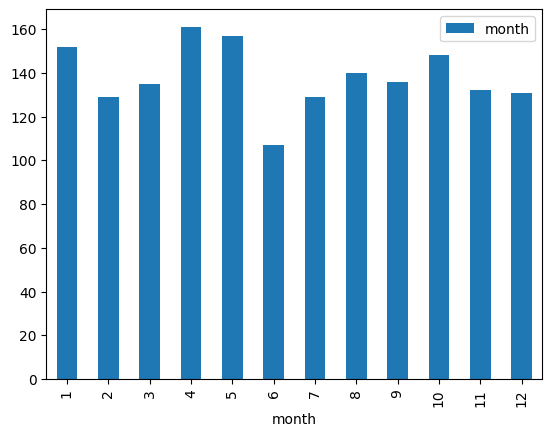

In [65]:
ibov[filter_entrada].groupby('month').agg({'month' : 'count'}).plot(kind='bar')

<Axes: xlabel='day'>

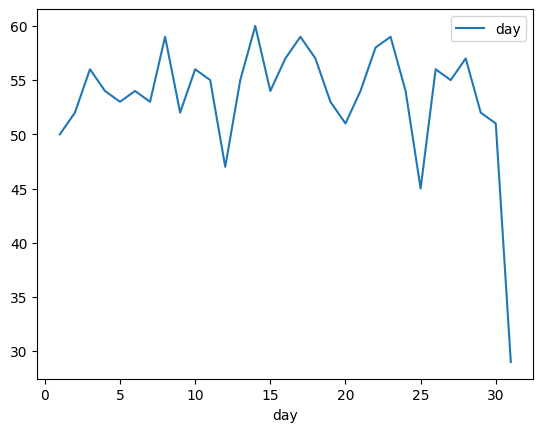

In [69]:
ibov[filter_entrada].groupby('day').agg({'day' : 'count'}).plot(kind='line')